# Task: 1
## - Import Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from math import sqrt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Task 2:
## Open DataFrame

In [3]:
train_data = pd.read_csv("/content/Reviews_Classified.csv")
train_data = train_data.drop(columns="Unnamed: 0")
test_data = train_data

# Task 3:
## - Remove stopwords from text

In [4]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [5]:
corpus= []
corpus1= []
for i in range(0, 500):
    corpus.append(review_to_words(train_data['Text'][i]))
    corpus1.append(review_to_words(train_data['Text'][i]))

In [6]:
train_data['new_Phrase']=corpus
train_data.drop(['Text'],axis=1,inplace=True)

# Task 4:
## - Show most frequent words in classification

In [7]:
positive=train_data[train_data['Classification']==('positive')]
negative=train_data[train_data['Classification']==('negative')]
neutral=train_data[train_data['Classification']==('neutral')]

words_p  = ' '.join(positive['new_Phrase'])
words_n  = ' '.join(negative['new_Phrase'])
words_ne = ' '.join(neutral['new_Phrase'])

split_word_p  = " ".join([word for word in words_p.split()])
split_word_n  = " ".join([word for word in words_n.split()])
split_word_ne = " ".join([word for word in words_ne.split()])

wordcloud_p = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word_p)

wordcloud_n = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word_n)

wordcloud_ne = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word_ne)

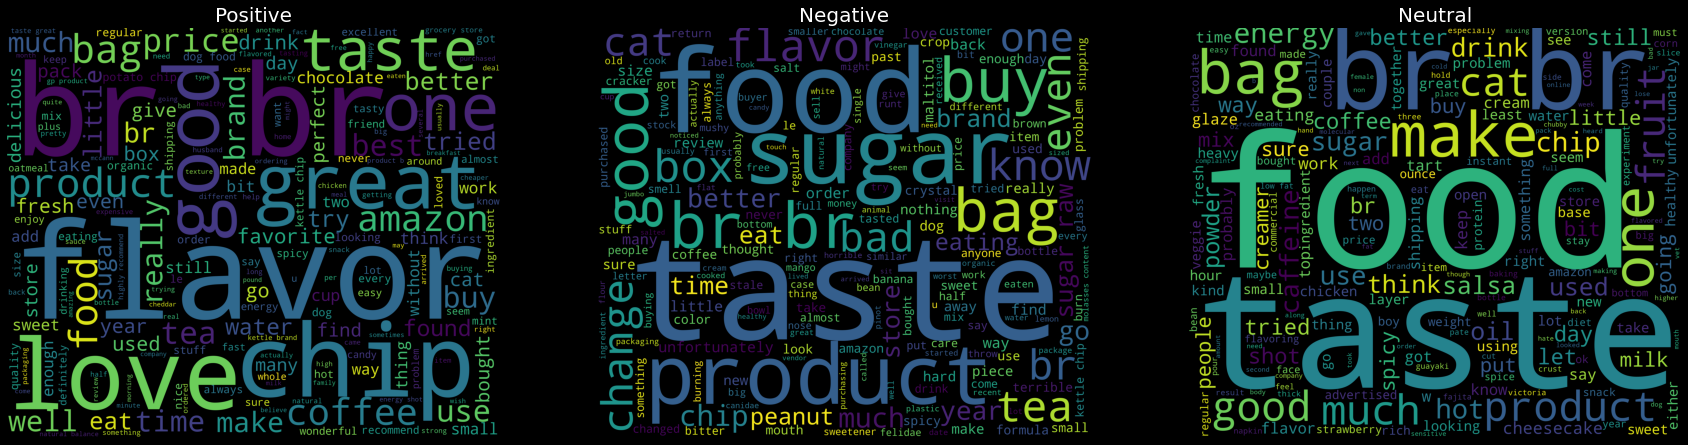

In [8]:
fig = plt.figure(figsize=(30, 30))
plt.style.use("dark_background")
fig.set_facecolor("black")

fig.add_subplot(1, 3, 1)
plt.imshow(wordcloud_p)
plt.axis('off')
plt.title("Positive", fontsize=20)

fig.add_subplot(1, 3, 2)
plt.imshow(wordcloud_n)
plt.axis('off')
plt.title("Negative", fontsize=20)

fig.add_subplot(1, 3, 3)
plt.imshow(wordcloud_ne)
plt.axis('off')
plt.title("Neutral", fontsize=20)

plt.show()

# Task 5:
## - Train NaiveBayes Multinomial

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:,1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.8, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)

# Task 6:
## - Show results

In [18]:
from sklearn import metrics
tp_neg, tp1, tp2, tp3, tp_neu, tp5, tp6, tp7, tp_pos = metrics.confusion_matrix(y, y_real_pred).ravel()
fn_neg = tp1+tp2; fn_neu = tp3+tp5; fn_pos = tp6+tp7
fp_neg = tp3+tp6; fp_neu = tp1+tp7; fp_pos = tp2+tp5
vn_neg = tp_neu+tp5+tp7+tp_pos; vn_neu = tp_neg+tp6+tp2+tp_pos; vn_pos = tp_neg+tp1+tp3+tp_neu
print("VP neg:" + str(tp_neg) + "\tVP neu:" + str(tp_neu) + "\tVP pos:" + str(tp_pos))
print("FN neg:" + str(fn_neg) + "\tFN neu:" + str(fn_neu) + "\tFN pos:" + str(fn_pos))
print("FP neg:" + str(fp_neg) + "\tFP neu:" + str(fp_neu) + "\tFP pos:" + str(fp_pos))
print("VN neg:" + str(vn_neg) + "\tVN neu:" + str(vn_neu) + "\tVN pos:" + str(vn_pos))
target_names = ['negative','neutral','positive']
print(classification_report(y, y_real_pred, target_names=target_names))

VP neg:9	VP neu:8	VP pos:382
FN neg:55	FN neu:29	FN pos:17
FP neg:6	FP neu:17	FP pos:78
VN neg:430	VN neu:446	VN pos:23
              precision    recall  f1-score   support

    negative       0.60      0.14      0.23        64
     neutral       0.32      0.22      0.26        37
    positive       0.83      0.96      0.89       399

    accuracy                           0.80       500
   macro avg       0.58      0.44      0.46       500
weighted avg       0.76      0.80      0.76       500



In [24]:
x__test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

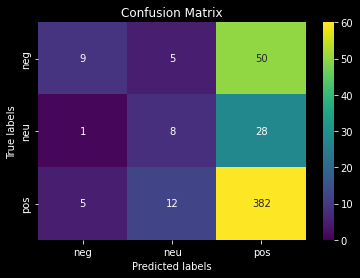

In [12]:
cm = metrics.confusion_matrix(y, y_real_pred)
ax= plt.subplot()
color = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=color, vmin=0, vmax=60); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['neg', 'neu', 'pos']); ax.yaxis.set_ticklabels(['neg', 'neu', 'pos']);